In [1]:
'''
Uso de Árbol de Decisión como Regresor.
Para fijar ideas, usarlo como regresor significar que lo usaremos para predecir
pero no usando usando un conjunto de datos con muchas características, sino que
tomaremos una o varias característica como variable/s INDEPENDIENTE y otra
(la que queremos predecir) como variable DEPENDIENTE.

'''

# cargamos las librerías que usaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.tree import DecisionTreeRegressor, plot_tree

warnings.filterwarnings('ignore')


In [2]:
# cargamos los datos en un df, directamente desde Seaborn
# nos interesa ver si podemos encontrar relaciones entre algunas variables continuas

data = sns.load_dataset('anscombe')

In [3]:
print(data.shape)
print(data.head(10))
print(data.columns)
print(data.tail())

(44, 3)
  dataset     x      y
0       I  10.0   8.04
1       I   8.0   6.95
2       I  13.0   7.58
3       I   9.0   8.81
4       I  11.0   8.33
5       I  14.0   9.96
6       I   6.0   7.24
7       I   4.0   4.26
8       I  12.0  10.84
9       I   7.0   4.82
Index(['dataset', 'x', 'y'], dtype='object')
   dataset     x      y
39      IV   8.0   5.25
40      IV  19.0  12.50
41      IV   8.0   5.56
42      IV   8.0   7.91
43      IV   8.0   6.89


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [5]:
print(data.isnull().sum())

dataset    0
x          0
y          0
dtype: int64


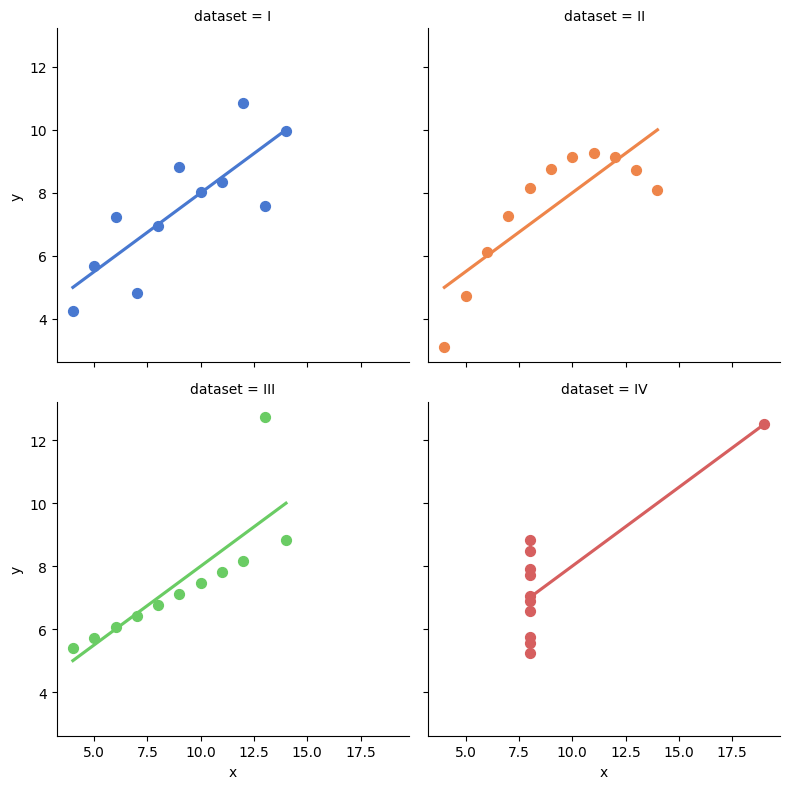

In [6]:
# Show the results of a linear regression within each dataset
sns.lmplot(
    data=data, x="x", y="y", col="dataset", hue="dataset",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}
)

In [7]:
# separamos el dataset II
data2=data[data['dataset']=='II']
data2

,dataset,x,y
11,II,10.0,9.14
12,II,8.0,8.14
13,II,13.0,8.74
14,II,9.0,8.77
15,II,11.0,9.26
16,II,14.0,8.10
17,II,6.0,6.13
18,II,4.0,3.10
19,II,12.0,9.13
20,II,7.0,7.26


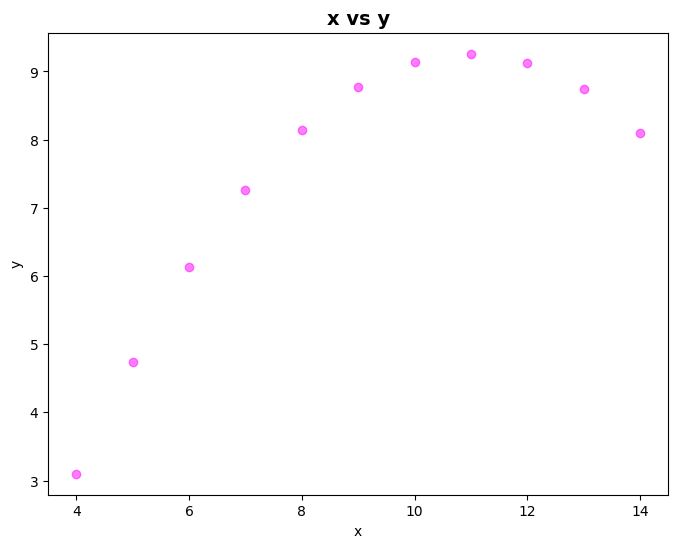

In [8]:
# graficaremos los valores del dataset

fig=plt.figure(figsize=(8,6))
plt.scatter(data2['x'],data2['y'],color="magenta", alpha=0.5)
plt.title("x vs y",fontsize=14,fontweight="bold")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
plt.close()


In [9]:
# Definimos las variables predictoras e independiente
y=data2.pop('y')
y

11    9.14
12    8.14
13    8.74
14    8.77
15    9.26
16    8.10
17    6.13
18    3.10
19    9.13
20    7.26
21    4.74
Name: y, dtype: float64

In [10]:
# Ahora ponemos a trabajar al arbolito...
# pedimos que calcule el score (qué tan cerca está la predicción de los datos)
# comparamos la predicción con los datos y graficamos
# instanciamos modelo
dt = DecisionTreeRegressor(random_state = 16)
# entrenamos...
x_train=data2['x'].to_frame()
dt.fit(x_train, y)

'''
class sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best',
 max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
  max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)

'''

"\nclass sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best',\n max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,\n  max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)\n\n"

In [12]:

# VAMOS A PEDIR UNA PREDICCIÓN Y GRAFICARLA CON OTRO COLOR sobre X_test
x_test=pd.DataFrame([[4.5],[6.5],[8.5],[10.5],[12.5]])
y_pred=dt.predict(x_test)

print(y_pred)

[3.1  6.13 8.14 9.14 9.13]


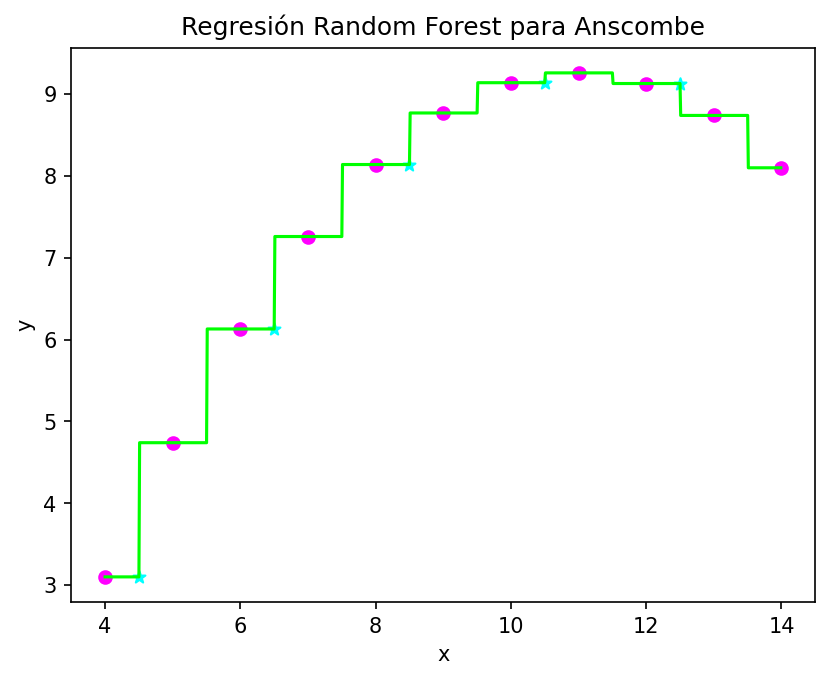

In [13]:
# definimos el rango de x para graficar
x_vect = np.arange(4.0, 14., 0.01) # es un vector numpy, NO pandas
x_graf = x_vect.reshape((len(x_vect), 1)) # ahora es un dataframe de 1 col

# armamos gráfico
plt.figure(dpi=150)   # abro figura
plt.scatter(x_train, y, c = 'magenta')     # grafica los datos
plt.plot(x_graf, dt.predict(x_graf), color = 'lime') # id predicción
plt.scatter(x_test, y_pred, color='cyan', marker='*')
plt.plot()
plt.title(f'Regresión Random Forest para Anscombe')
plt.xlabel('x')
plt.ylabel('y')
#plt.savefig('anscombe.png', dpi = 300)  # guardo en archivo
plt.show()  # muestro gráfico
plt.close() # cierro figura


In [15]:
# preguntamos qué tal predice sobre los datos ingresados
print('\n')
print(f'Precisión sobre valores REALES: {dt.score(x_train, y)}')
print(f'Precisión sobre valores PREDICCION: {dt.score(x_graf, dt.predict(x_graf))}')
print('\n')




Precisión sobre valores REALES: 1.0
Precisión sobre valores PREDICCION: 1.0




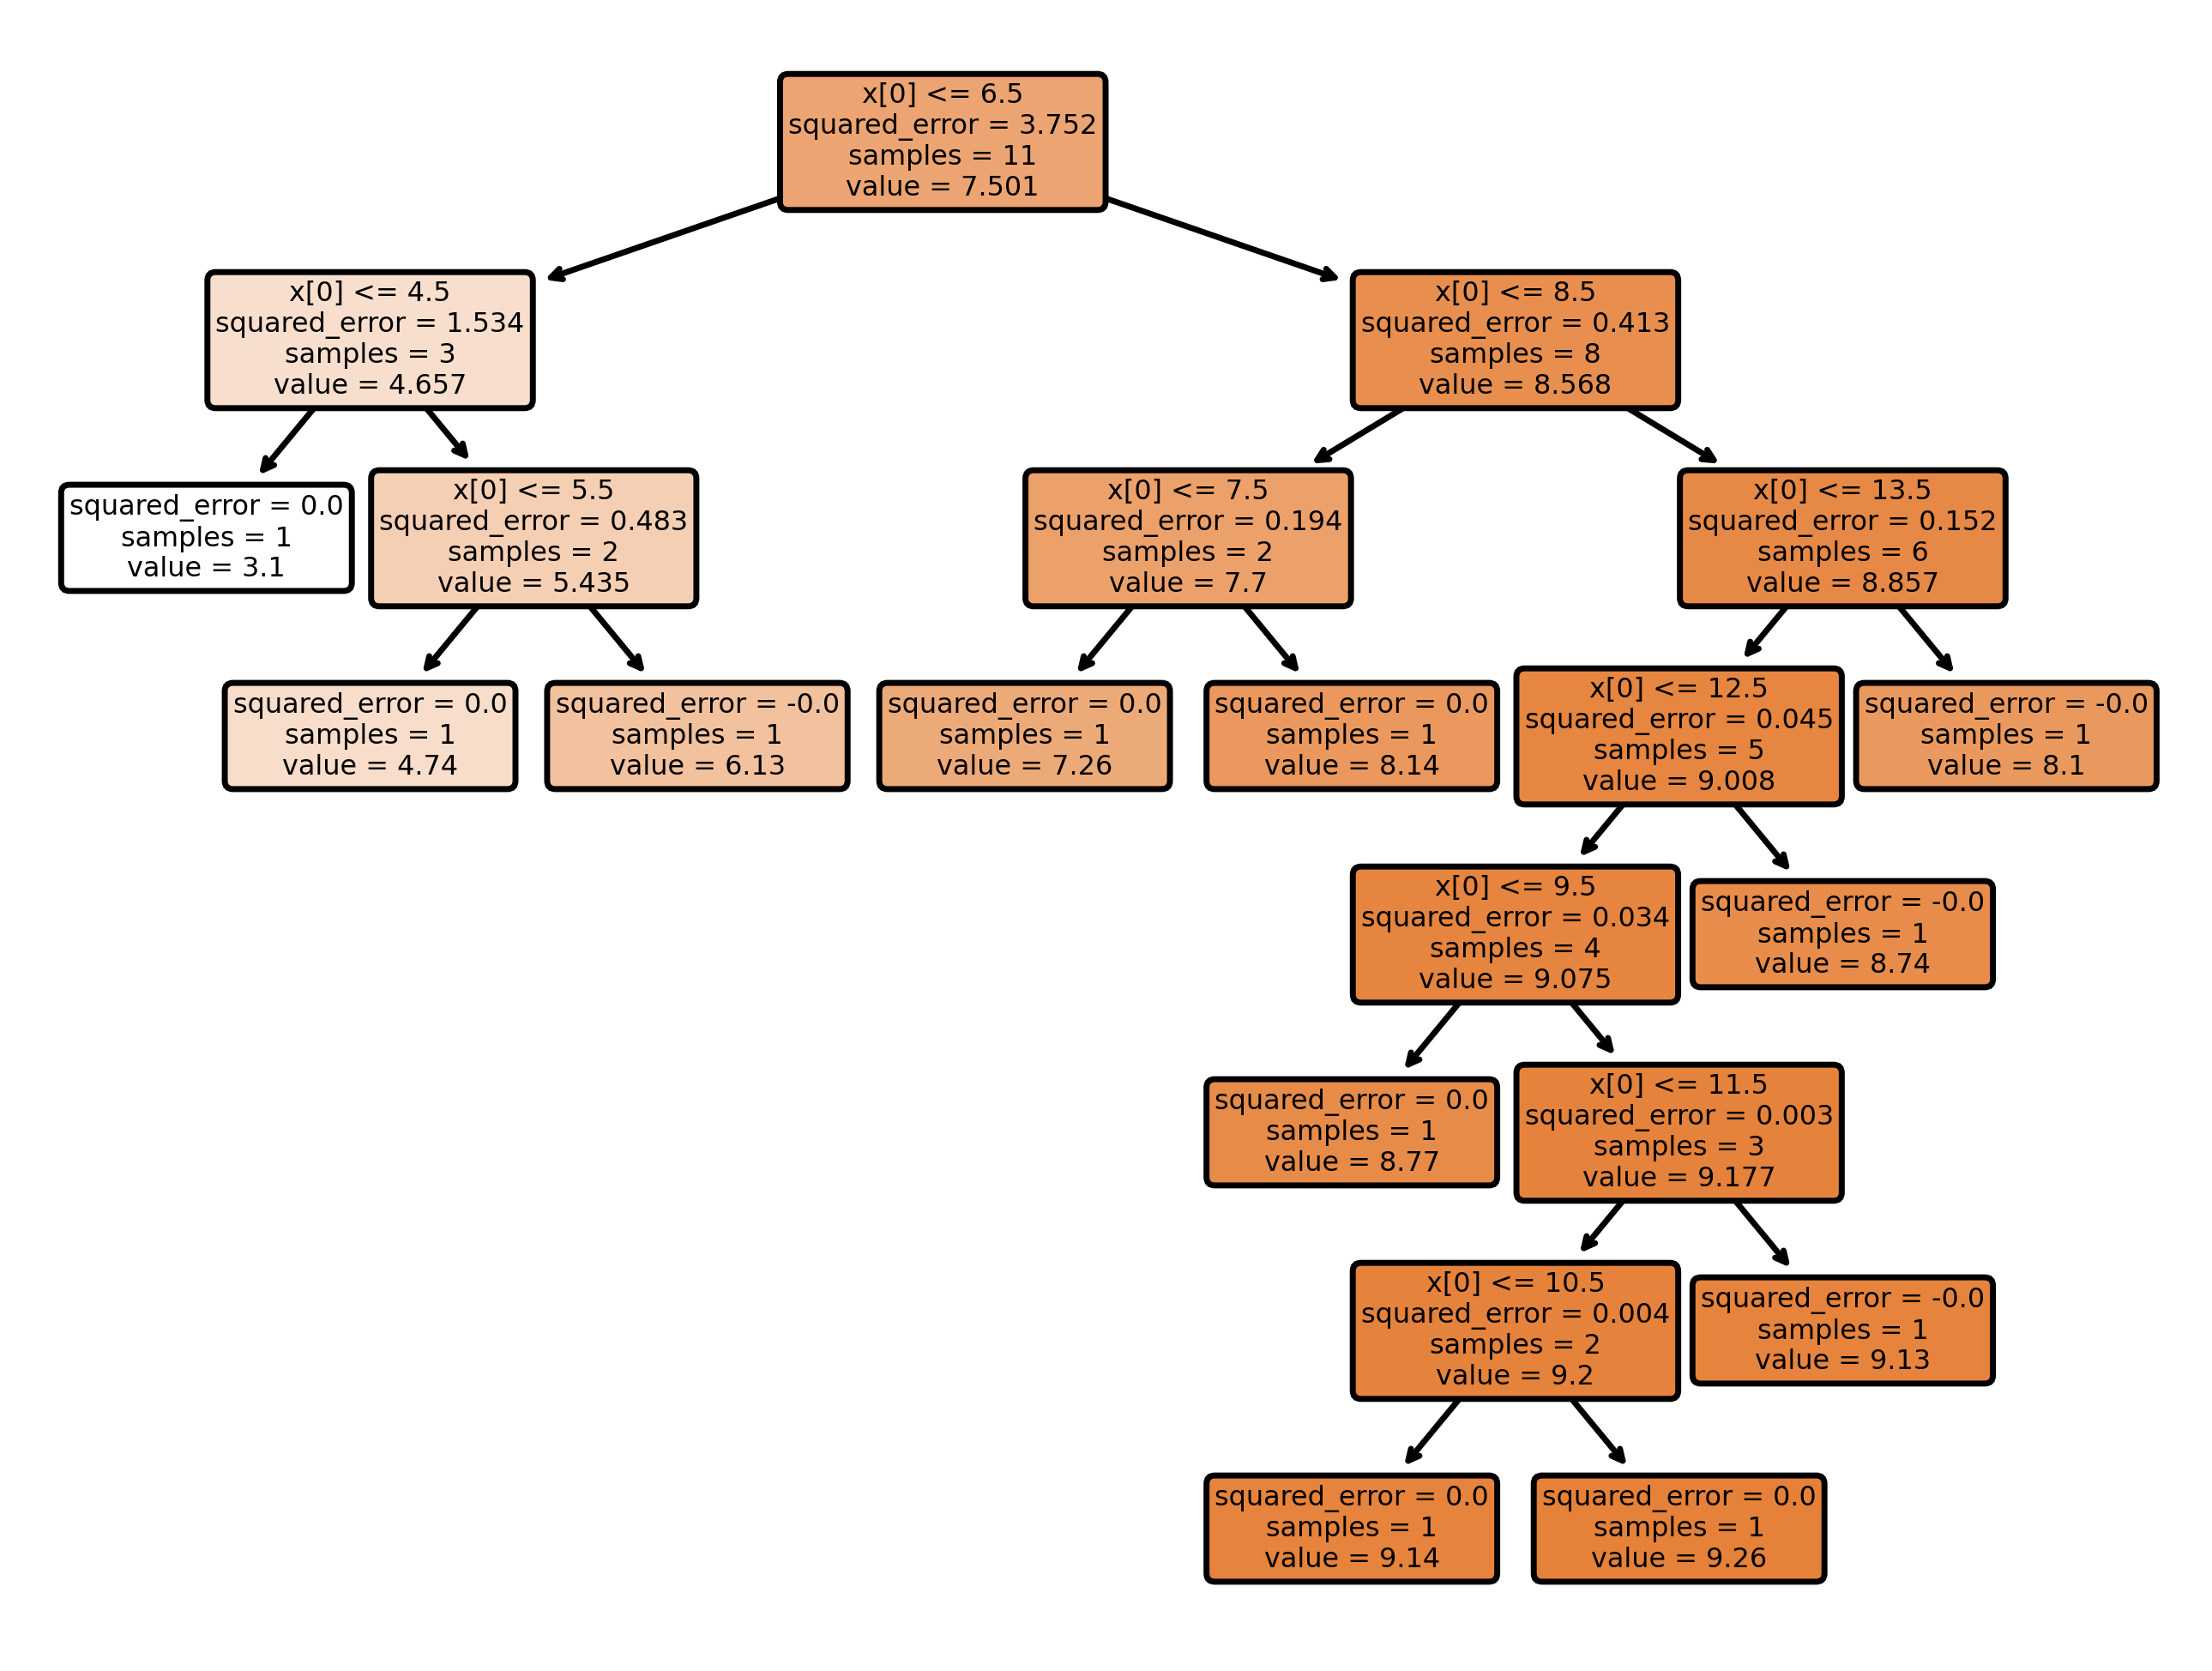

In [14]:
# gráfico del árbol que hace la regresión
plt.figure(dpi=500)
plot_tree(dt, filled=True, rounded=True)
plt.show()
plt.close()